In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
import os

In [3]:
a_df = pd.read_excel(r"C:\Users\jeeve\Desktop\PGC\Course 5 Python\Project\FEV-data-Excel.xlsx")

In [4]:
#TASK 1
filtered_df = a_df[(a_df['Minimal price (gross) [PLN]'] <= 350000) &
(a_df['Range (WLTP) [km]'] >= 400)]
avg_battery = filtered_df.groupby('Make')['Battery capacity [kWh]'].mean().reset_index()
print("Filtered EVs:")
print(filtered_df[['Car full name', 'Make', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]']])
print("\nAverage Battery Capacity by Manufacturer:")
print(avg_battery)

Filtered EVs:
                        Car full name           Make  \
0              Audi e-tron 55 quattro           Audi   
8                             BMW iX3            BMW   
15        Hyundai Kona electric 64kWh        Hyundai   
18                   Kia e-Niro 64kWh            Kia   
20                   Kia e-Soul 64kWh            Kia   
22                  Mercedes-Benz EQC  Mercedes-Benz   
39  Tesla Model 3 Standard Range Plus          Tesla   
40           Tesla Model 3 Long Range          Tesla   
41          Tesla Model 3 Performance          Tesla   
47    Volkswagen ID.3 Pro Performance     Volkswagen   
48              Volkswagen ID.3 Pro S     Volkswagen   
49                Volkswagen ID.4 1st     Volkswagen   

    Minimal price (gross) [PLN]  Range (WLTP) [km]  
0                        345700                438  
8                        282900                460  
15                       178400                449  
18                       167990              

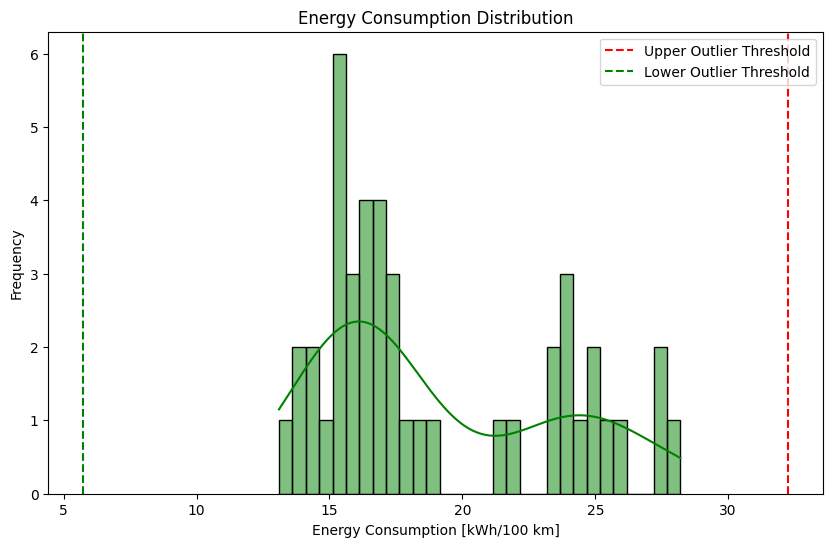

Outliers in Energy Consumption:
Empty DataFrame
Columns: [Make, Model, mean - Energy consumption [kWh/100 km]]
Index: []


In [5]:
# Task 2: Identify Outliers in Energy Consumption (Z-Score Method Fixed)
energy_consumption_column = [col for col in a_df.columns if 'energy consumption' in col.lower()][0]
energy_consumption = a_df[energy_consumption_column].dropna()
# Calculate Z-Scores
z_scores = (energy_consumption - energy_consumption.mean()) / energy_consumption.std()
# Reset index to align DataFrame and Z-score series
energy_consumption = energy_consumption.reset_index(drop=True)
z_scores = z_scores.reset_index(drop=True)
# Defining Outliers
outliers = a_df.loc[z_scores[np.abs(z_scores) > 3].index]
# Plot the Distribution with Z-Score Threshold
plt.figure(figsize=(10, 6))
sns.histplot(energy_consumption, bins=30, kde=True, color='green')
plt.title('Energy Consumption Distribution')
plt.xlabel('Energy Consumption [kWh/100 km]')
plt.ylabel('Frequency')
plt.axvline(energy_consumption.mean() + 3 * energy_consumption.std(), color='red', linestyle='dashed', label='Upper Outlier Threshold')
plt.axvline(energy_consumption.mean() - 3 * energy_consumption.std(), color='green', linestyle='dashed', label='Lower Outlier Threshold')
plt.legend()
plt.show()
# Display Outliers
print("Outliers in Energy Consumption:")
print(outliers[['Make', 'Model', energy_consumption_column]])

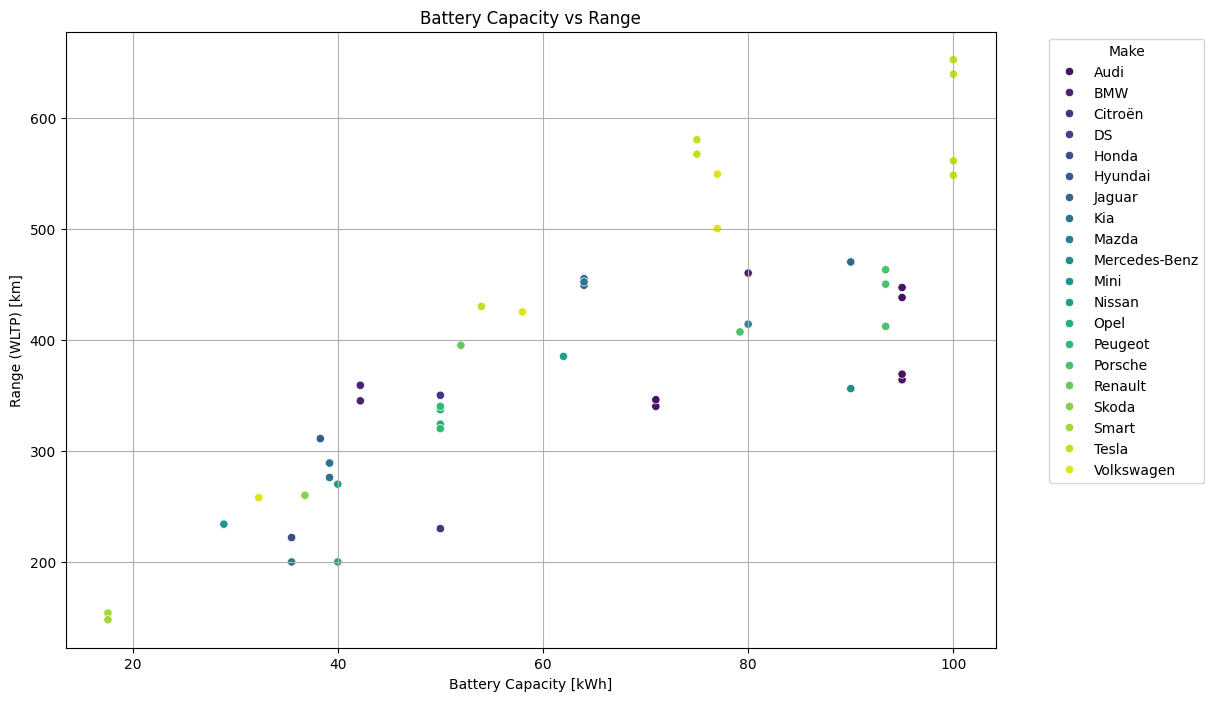

Correlation between Battery Capacity and Range: 0.81
There is a strong positive relationship between Battery Capacity and Range.


In [6]:
#TASK 3
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Battery capacity [kWh]', y='Range (WLTP) [km]', data=a_df, hue='Make', palette='viridis')
plt.title('Battery Capacity vs Range')
plt.xlabel('Battery Capacity [kWh]')
plt.ylabel('Range (WLTP) [km]')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
correlation = a_df[['Battery capacity [kWh]', 'Range (WLTP) [km]']].corr().iloc[0, 1]
print(f"Correlation between Battery Capacity and Range: {correlation:.2f}")
if correlation > 0.7:
    print("There is a strong positive relationship between Battery Capacity and Range.")
elif correlation > 0.4:
    print("There is a moderate positive relationship between Battery Capacity and Range.")
else:
    print("There is a weak or no significant relationship between Battery Capacity and Range.")

In [7]:
#TASK 4
def recommend_ev():
    budget = int(input("Enter your Budget (PLN): "))
    range_km = int(input("Enter Minimum Range (km): "))
    battery_capacity = float(input("Enter Minimum Battery Capacity (kWh): "))
    filtered = a_df[(a_df['Minimal price (gross) [PLN]'] <= budget) &
                (a_df['Range (WLTP) [km]'] >= range_km) &
                (a_df['Battery capacity [kWh]'] >= battery_capacity)]
    top_ev = filtered[['Car full name', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']].head(3)
    if top_ev.empty:
        print("\nNo EVs Found Matching Your Criteria!")
    else:
        print("\nTop 3 Recommended EVs:")
        print(top_ev)
recommend_ev()


Top 3 Recommended EVs:
                  Car full name  Minimal price (gross) [PLN]  \
0        Audi e-tron 55 quattro                       345700   
8                       BMW iX3                       282900   
15  Hyundai Kona electric 64kWh                       178400   

    Range (WLTP) [km]  Battery capacity [kWh]  
0                 438                    95.0  
8                 460                    80.0  
15                449                    64.0  


In [9]:
#TASK5
tesla = a_df[a_df['Make'] == 'Tesla']['Engine power [KM]']
audi = a_df[a_df['Make'] == 'Audi']['Engine power [KM]']
t_stat, p_value = ttest_ind(tesla, audi)
print("Tesla Engine Power Average:", tesla.mean())
print("Audi Engine Power Average:", audi.mean())
print("T-Statistic:", t_stat)
print("P-Value:", p_value)
if p_value < 0.05:
    print("\n Significant Difference between Tesla and Audi Engine Power")
else:
    print("\n!! No Significant Difference between Tesla and Audi Engine Power")

Tesla Engine Power Average: 533.0
Audi Engine Power Average: 392.0
T-Statistic: 1.7024444538261416
P-Value: 0.11672692675082785

!! No Significant Difference between Tesla and Audi Engine Power


In [10]:
video_link = "https://drive.google.com/file/d/17w8VIzo1f1p7if873wF8447eVlbR16lF/view?usp=sharing"
with open("VideoLink.txt", "w") as file:
    file.write(f"Project Video Explanation Link: {video_link}")
print("Video link saved successfully.")
print(f"Video Explanation Link: {video_link}")
if os.path.exists("VideoLink.txt"):
    print("File created successfully")
else:
    print("Error")    

Video link saved successfully.
Video Explanation Link: https://drive.google.com/file/d/17w8VIzo1f1p7if873wF8447eVlbR16lF/view?usp=sharing
File created successfully
